In [6]:
import torch
import xgboost as xgb

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bst = xgb.Booster()
bst.load_model('../model/xgb_model.json')
target_T = 7

In [18]:
from model.LSTM_base_model import test_start_date, test_end_date,T_values
from model.my_xgboost import lstm_to_xgboost

X_test, Y_test = lstm_to_xgboost(test_start_date, test_end_date, target_T)

In [8]:
# 将数据转换为DMatrix对象，XGBoost专用的数据结构
dtest = xgb.DMatrix(X_test)

# 预测，使用iteration_range指定使用的树的范围
# bst.best_iteration 是在训练时通过early stopping找到的最佳迭代次数
best_iteration = bst.best_iteration if hasattr(bst, 'best_iteration') else None
if best_iteration is not None:
    Y_pred = bst.predict(dtest, iteration_range=(0, best_iteration + 1))
else:
    # 如果没有使用早停或找不到最佳迭代次数，直接预测
    Y_pred = bst.predict(dtest)

In [16]:
X_test

,model_1_Y_pred,model_3_Y_pred,model_7_Y_pred,model_15_Y_pred,model_30_Y_pred
2022-11-02,-0.00107657,0.00210379,0.00160871,-0.00020456,0.00121164
2022-11-03,-0.00110239,0.00582315,0.00131690,-0.00107404,0.00124587
2022-11-04,-0.00112979,0.00225635,0.00150291,-0.00137312,0.00126094
2022-11-07,-0.00113493,0.00084411,0.00028533,-0.00228382,0.00122473
2022-11-08,-0.00114073,-0.00226978,0.00104981,-0.00287824,0.00106837
...,...,...,...,...,...
2023-08-22,-0.00063735,0.00033565,-0.00167886,-0.00328511,-0.00198394
2023-08-23,-0.00063593,0.00272726,0.00011475,-0.00189110,-0.00182523
2023-08-24,-0.00063794,0.00217294,0.00112097,-0.00139016,-0.00149547
2023-08-25,-0.00064240,-0.00057894,0.00080514,-0.00213591,-0.00123790


In [15]:
# 打印Y_pred和Y_test的形状
print(Y_pred.shape, Y_test.shape)

(214,) (214,)


In [11]:
# 将Y_pred和Y_test合并为一个DataFrame，方便查看
import pandas as pd
df = pd.DataFrame({'Y_pred': Y_pred, 'Y_test': Y_test})
df

,Y_pred,Y_test
2022-11-02,0.00084598,0.00424328
2022-11-03,0.00008837,0.00551081
2022-11-04,0.00065219,0.00339071
2022-11-07,-0.00104258,0.00231016
2022-11-08,-0.00014929,0.00254901
...,...,...
2023-08-22,-0.00313076,-0.00111899
2023-08-23,-0.00084559,-0.00052507
2023-08-24,0.00021496,-0.00223389
2023-08-25,-0.00007004,-0.00335520


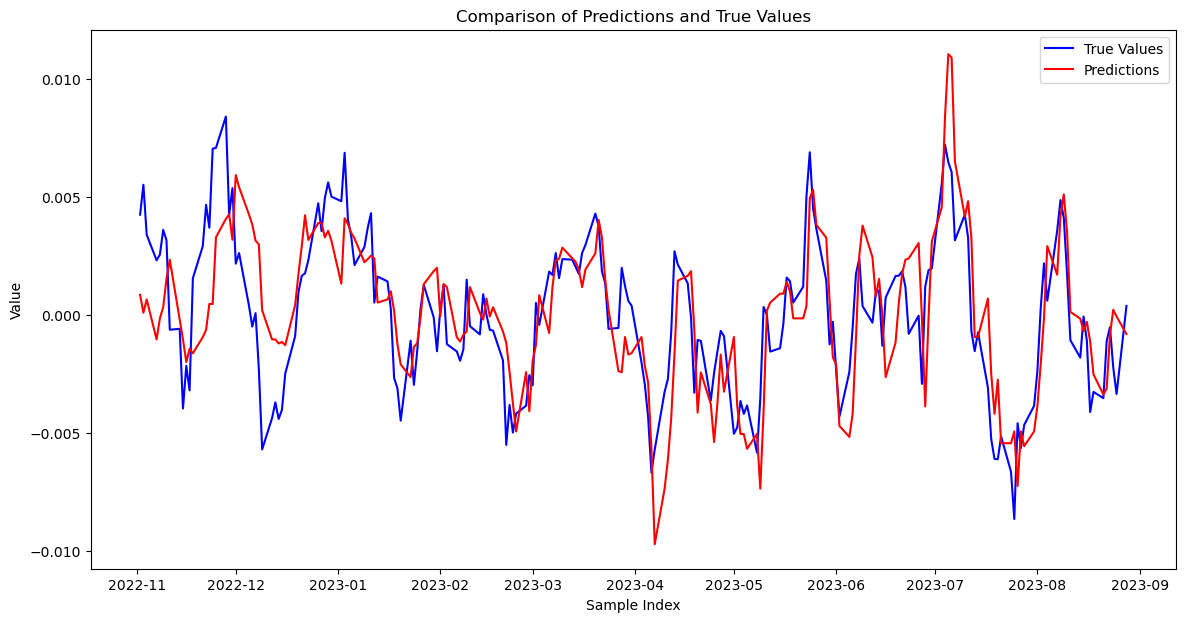

In [14]:
import matplotlib.pyplot as plt

# 设置绘图尺寸
plt.figure(figsize=(14, 7))

# 绘制真实值
plt.plot(df['Y_test'], label='True Values', color='blue')

# 绘制预测值
plt.plot(df['Y_pred'], label='Predictions', color='red')

# 添加标题和坐标轴标签
plt.title('Comparison of Predictions and True Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')

# 添加图例
plt.legend()

# 显示图表
plt.show()

In [17]:
# 将Y_test, Y_pred,X_test 合并

df_all = X_test
df_all['XGB_pred'] = Y_pred
df_all['Y_true'] = Y_test
df_all

,model_1_Y_pred,model_3_Y_pred,model_7_Y_pred,model_15_Y_pred,model_30_Y_pred,XGB_pred,Y_true
2022-11-02,-0.00107657,0.00210379,0.00160871,-0.00020456,0.00121164,0.00084598,0.00424328
2022-11-03,-0.00110239,0.00582315,0.00131690,-0.00107404,0.00124587,0.00008837,0.00551081
2022-11-04,-0.00112979,0.00225635,0.00150291,-0.00137312,0.00126094,0.00065219,0.00339071
2022-11-07,-0.00113493,0.00084411,0.00028533,-0.00228382,0.00122473,-0.00104258,0.00231016
2022-11-08,-0.00114073,-0.00226978,0.00104981,-0.00287824,0.00106837,-0.00014929,0.00254901
...,...,...,...,...,...,...,...
2023-08-22,-0.00063735,0.00033565,-0.00167886,-0.00328511,-0.00198394,-0.00313076,-0.00111899
2023-08-23,-0.00063593,0.00272726,0.00011475,-0.00189110,-0.00182523,-0.00084559,-0.00052507
2023-08-24,-0.00063794,0.00217294,0.00112097,-0.00139016,-0.00149547,0.00021496,-0.00223389
2023-08-25,-0.00064240,-0.00057894,0.00080514,-0.00213591,-0.00123790,-0.00007004,-0.00335520


In [19]:
# 将 列名形如f'model_{T}_Y_pred' 改名为 f'lstm-{T}_pred'，T为变量
for T in T_values:
    # 对于每个 T，检查列名是否存在，然后进行替换
    old_column_name = f'model_{T}_Y_pred'
    new_column_name = f'lstm-{T}_pred'
    if old_column_name in df.columns:
        df_all.rename(columns={old_column_name: new_column_name}, inplace=True)

df_all

,model_1_Y_pred,model_3_Y_pred,model_7_Y_pred,model_15_Y_pred,model_30_Y_pred,XGB_pred,Y_true
2022-11-02,-0.00107657,0.00210379,0.00160871,-0.00020456,0.00121164,0.00084598,0.00424328
2022-11-03,-0.00110239,0.00582315,0.00131690,-0.00107404,0.00124587,0.00008837,0.00551081
2022-11-04,-0.00112979,0.00225635,0.00150291,-0.00137312,0.00126094,0.00065219,0.00339071
2022-11-07,-0.00113493,0.00084411,0.00028533,-0.00228382,0.00122473,-0.00104258,0.00231016
2022-11-08,-0.00114073,-0.00226978,0.00104981,-0.00287824,0.00106837,-0.00014929,0.00254901
...,...,...,...,...,...,...,...
2023-08-22,-0.00063735,0.00033565,-0.00167886,-0.00328511,-0.00198394,-0.00313076,-0.00111899
2023-08-23,-0.00063593,0.00272726,0.00011475,-0.00189110,-0.00182523,-0.00084559,-0.00052507
2023-08-24,-0.00063794,0.00217294,0.00112097,-0.00139016,-0.00149547,0.00021496,-0.00223389
2023-08-25,-0.00064240,-0.00057894,0.00080514,-0.00213591,-0.00123790,-0.00007004,-0.00335520


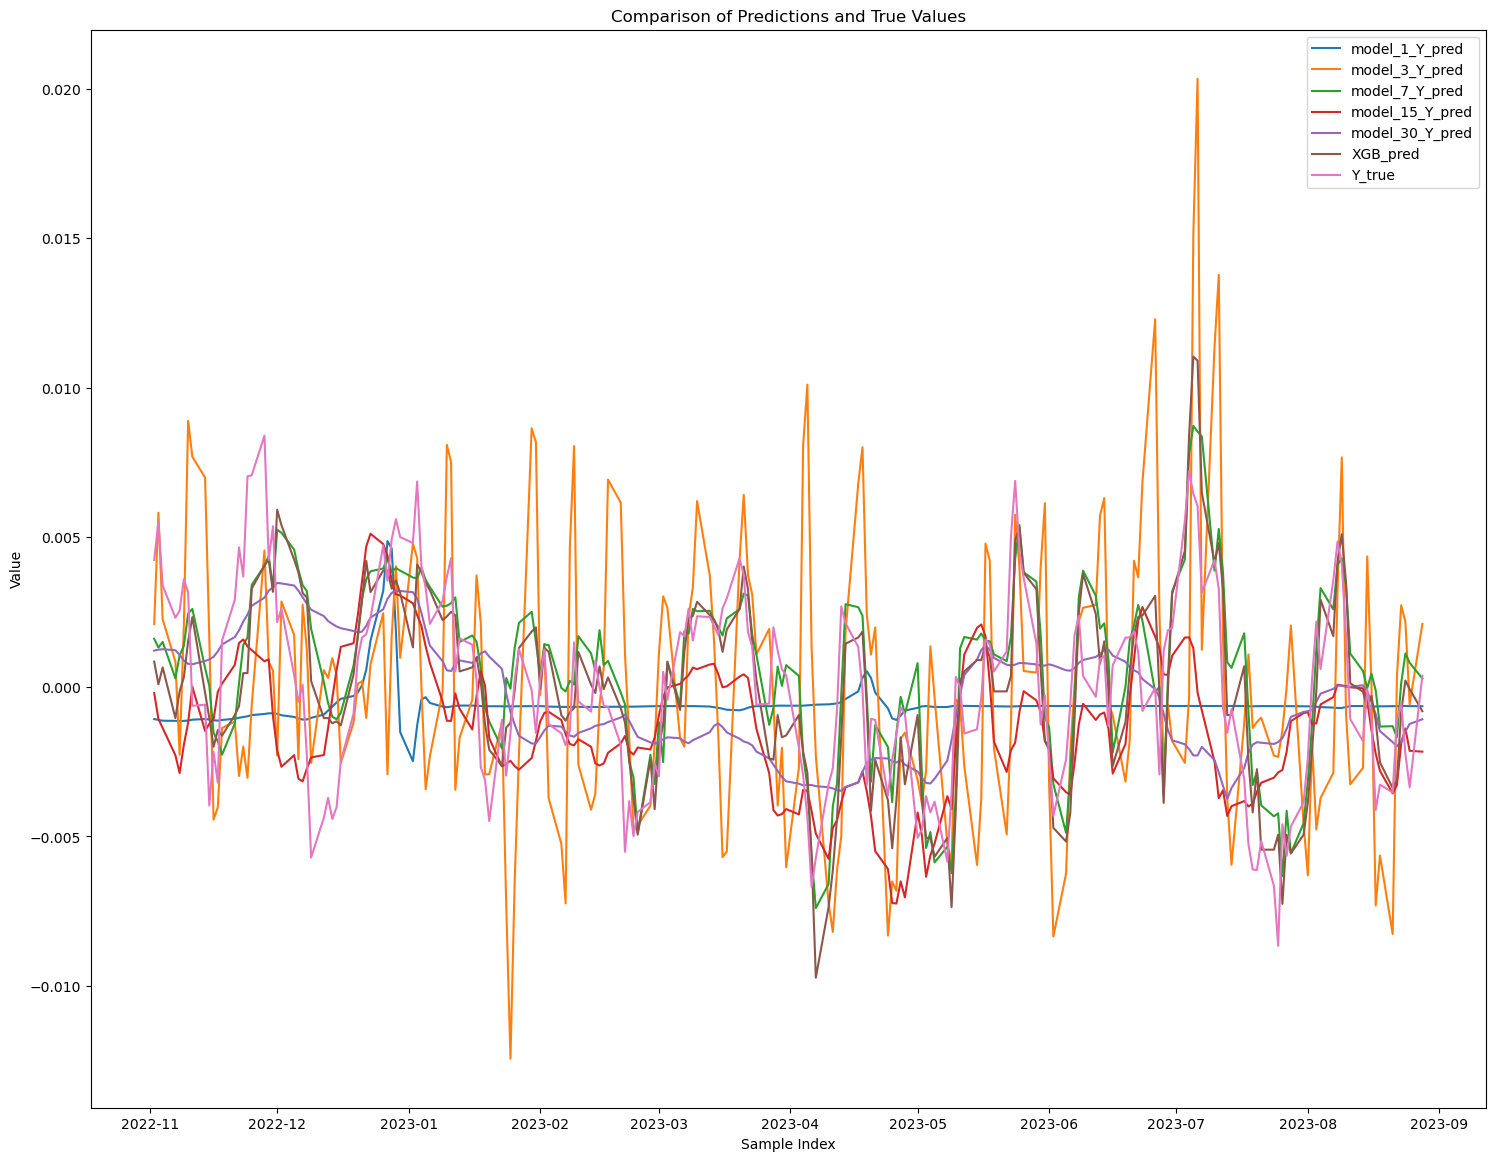

In [21]:
# 画一个折线图，每一列是一个折线
plt.figure(figsize=(18, 14))
for column in df_all.columns:
    plt.plot(df_all[column], label=column)
    
plt.title('Comparison of Predictions and True Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

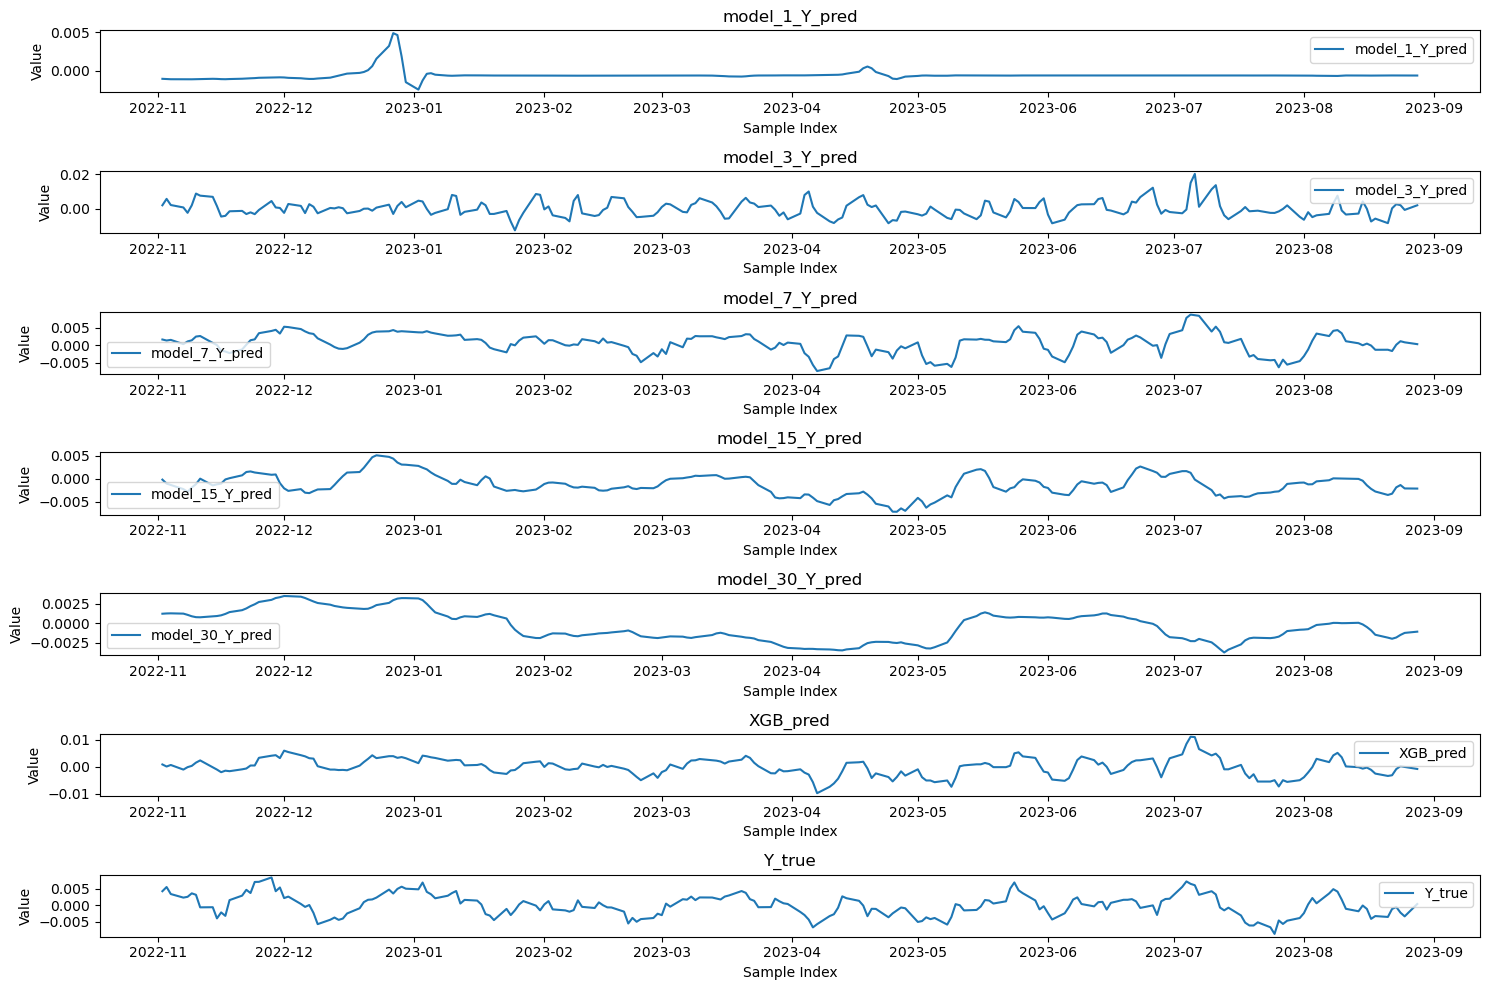

In [27]:
# 画一个垂直排列的多个子图，每个子图是一个折线
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_all.columns):
    plt.subplot(len(df_all.columns), 1, i + 1)
    plt.plot(df_all[column], label=column)
    plt.title(column)
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    #间距
    plt.tight_layout()
    
    